# ELE456 Final Project Simulation
The following simulation is based on the paper ["Observation of quantum state collapse and revival due to the single-photon Kerr effect."](https://www.nature.com/articles/nature11902/)

In [1]:
from qutip import *

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [70]:
# software versions
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.5.0
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.1.3
Cython,0.29.17
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,7.13.0
Python,"3.8.2 (default, Mar 26 2020, 10:43:30) [Clang 4.0.1 (tags/RELEASE_401/final)]"
OS,posix [darwin]


# Coherent state visualization

To decide when to cut off the Fock state basis, we plot the Fock-basis probability distribution of the coherent state. The Fock state basis should be large enough so that it's sufficient to simulate the evolution of the desired coherent state. We should make sure the probability at the highest Fock state is negligible. On the other hand, this basis shouldn't be too large so that the numerical calculation can be efficient.

Text(0, 0.5, 'Probability')

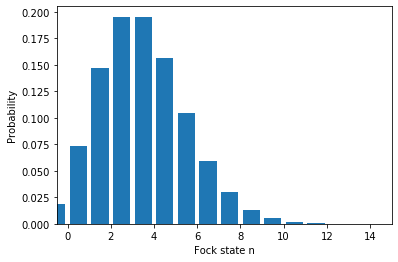

In [69]:
# Based on the plot below, N = 15 is a resonable choice of the Fock basis
N = 15
# the density matrix of the coherent state with mean photon number 4
rho_coherent = coherent_dm(N, 2)    
plt.bar(np.arange(0, N)-.5, rho_coherent.diag())
plt.xlim([-.5, N])
plt.xlabel('Fock state n')
plt.ylabel('Probability')

# Comparison of Q function and Wigner function 

We plot the Q function and Wigner function for both a superposition state and a mixed state of two coherent states. Through this comparison we show different information featured by these two tomographic methods.

In [133]:
N = 15
# a superposition state of two coherent states
psi_sup = (coherent(N, -2.0) + coherent(N, 2.0)).unit()

# a mixed state of two coherent states represented by the density matrix
dm_mix = (coherent_dm(N, -2.0) + coherent_dm(N, 2.0)).unit()

xvec = np.linspace(-3, 3, 500)    # range for the functions

# Calculate the Q function and Wigner function. 'wigner' and 'qfunc' can accept both state vector 
#and density matrix
Wigner_sup = wigner(psi_sup, xvec, xvec, g = 2)
Q_sup = qfunc(psi_sup, xvec, xvec, g = 2)
Wigner_mix = wigner(dm_mix, xvec, xvec, g = 2)    
Q_mix = qfunc(dm_mix, xvec, xvec, g = 2)

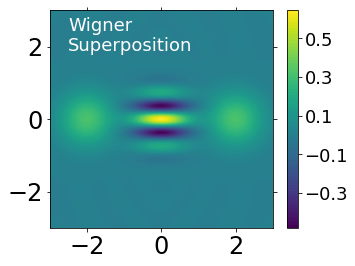

In [136]:
fig = plt.figure(figsize=(5, 4))
plt.contourf(xvec, xvec, Wigner_sup, 100)

# set colorbar and ticks
cbar = plt.colorbar(ticks=[-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
cbar.ax.tick_params(labelsize=18)

# set plot tick fontsizes and positions
ax = plt.gca()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.xticks([-2,0,2], fontsize= 24)
plt.yticks([-2,0,2], fontsize= 24)
    
plt.text(-2.5, 2.3, 'Wigner\nSuperposition', horizontalalignment='left',\
        verticalalignment='center', fontsize=18, color='white')

plt.savefig('./paper_fig/W_sup.pdf', transparent=True, bbox_inches='tight')


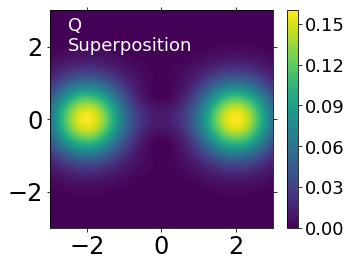

In [137]:
fig = plt.figure(figsize=(5, 4))
plt.contourf(xvec, xvec, Q_sup, 100)

# set colorbar and ticks
cbar = plt.colorbar(ticks=[0.00, 0.03, 0.06, 0.09, 0.12, 0.15])
cbar.ax.tick_params(labelsize=18)

# set plot tick fontsizes and positions
ax = plt.gca()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.xticks([-2,0,2], fontsize= 24)
plt.yticks([-2,0,2], fontsize= 24)

plt.text(-2.5, 2.3, 'Q\nSuperposition', horizontalalignment='left',\
        verticalalignment='center', fontsize=18, color='white')

plt.savefig('./paper_fig/Q_sup.pdf', transparent=True, bbox_inches='tight')


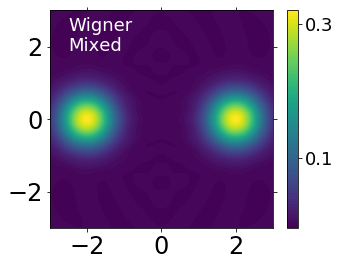

In [138]:
fig = plt.figure(figsize=(5, 4))
plt.contourf(xvec, xvec, Wigner_mix, 100)

# set colorbar and ticks
cbar = plt.colorbar(ticks=[-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
cbar.ax.tick_params(labelsize=18)

# set plot tick fontsizes and positions
ax = plt.gca()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.xticks([-2,0,2], fontsize= 24)
plt.yticks([-2,0,2], fontsize= 24)

plt.text(-2.5, 2.3, 'Wigner\nMixed', horizontalalignment='left',\
        verticalalignment='center', fontsize=18, color='white')

plt.savefig('./paper_fig/W_mix.pdf', transparent=True, bbox_inches='tight')


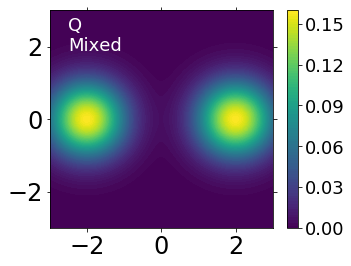

In [139]:
fig = plt.figure(figsize=(5, 4))
plt.contourf(xvec, xvec, Q_mix, 100)

# set colorbar and ticks
cbar = plt.colorbar(ticks=[0.00, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24])
cbar.ax.tick_params(labelsize=18)

# set plot tick fontsizes and positions
ax = plt.gca()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.xticks([-2,0,2], fontsize= 24)
plt.yticks([-2,0,2], fontsize= 24)
plt.text(-2.5, 2.3, 'Q\nMixed', horizontalalignment='left',\
        verticalalignment='center', fontsize=18, color='white')

plt.savefig('./paper_fig/Q_mix.pdf', transparent=True, bbox_inches='tight')


# Solve for the evolution of a coherent state under Kerr Hamiltonian

We solve for the time evolution of a coherent state $|\beta = 2\rangle$ under the Hamiltonian

$$
\mathcal{H}_{Kerr} = -\frac{K}{2} a^\dagger a a^\dagger a
$$
where $K$ is the Kerr nonlinearity. We also consider the decay of the photon mode in the evolution which is characterized by the decay rate $\kappa$.
The values for the parameters are obtained from the Supplementary Information of the paper. 

To show the single-photon Kerr effect, the decay rate $\kappa$ should be small compared to the Kerr nonlinearity $K$. To give a characterization of this, we provide the simulation results of three different decay rates:

- $\kappa_1 = 2\pi\times10\,\mathrm{kHz}$, the decay rate provided in the paper;
- $\kappa_2 = 0$, no decay;
- $\kappa_3 = 10\times2\pi\times10\,\mathrm{kHz}$, 10 times the decay rate in the paper.

## $\kappa_1$, the decay rate in the paper

In [4]:
# experimental parameters from SI
K =  2 * np.pi * 0.325    # MHz
kappa = 2 * np.pi * 10e-3    # MHz

total_evolution_time = 8    # us
total_steps = 80000    # the step size of evolution time will be total_evolution_time/total_steps
N = 15    # number of cavity fock states, this should be large enough

psi0 = coherent(N, 2)    # initial coherent state
a = destroy(N)

H = - K/2 * a.dag() * a * a.dag() * a    # Kerr Hamiltonian

tlist_1 = np.linspace(0, total_evolution_time, total_steps)    # time list for simulation
output_1 = mesolve(H, psi0, tlist_1, [np.sqrt(kappa)*a])    # decay added by the 4th argument

## $\kappa_2$, no decay

In [18]:
# experimental parameters from SI
K =  2 * np.pi * 0.325    # MHz
kappa = 2 * np.pi * 10e-3    # MHz

total_evolution_time = 8    # us
total_steps = 80000    # the step size of evolution time will be total_evolution_time/total_steps
N = 15    # number of cavity fock states, this should be large enough

psi0 = coherent(N, 2)    # initial coherent state
a = destroy(N)

H = - K/2 * a.dag() * a * a.dag() * a    # Kerr Hamiltonian

tlist_2 = np.linspace(0, total_evolution_time, total_steps)    # time list for simulation
output_2 = mesolve(H, psi0, tlist_2)

## $\kappa_3$, stronger decay

In [76]:
# experimental parameters from SI
K =  2 * np.pi * 0.325    # MHz
kappa = 10* 2 * np.pi * 10e-3    # MHz

total_evolution_time = 8    # us
total_steps = 80000    # the step size of evolution time will be total_evolution_time/total_steps
N = 15    # number of cavity fock states, this should be large enough

psi0 = coherent(N, 2)    # initial coherent state
a = destroy(N)

H = - K/2 * a.dag() * a * a.dag() * a    # Kerr Hamiltonian

tlist_3 = np.linspace(0, total_evolution_time, total_steps)    # time list for simulation
output_3 = mesolve(H, psi0, tlist_3, [np.sqrt(kappa)*a])    # decay added by the 4th argument

# Visualization of the evolution by GIF & movies 

To visualize the time evolution of the state, we save the frames of the state at different time points. Then we combine them into GIF files by the following code. We can also generate short movies by a video editing software.

## $\kappa_1$, the decay rate in the paper

### Plot Q function of the state. 

In [81]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    # calculate the index of this frame in the full dataset 
    index_output_data = int(index_frame * total_steps/tot_frames)
    # calculate the time of this frame
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_1.states[index_output_data], xvec, xvec, g = 2)    
    # In qfunc, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    plt.colorbar(ticks=np.linspace(0, 0.3, 11))

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_Q/withdecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

### Plot Wigner function of the state. 


In [93]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    # calculate the index of this frame in the full dataset 
    index_output_data = int(index_frame * total_steps/tot_frames)
    # calculate the time of this frame
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_1.states[index_output_data], xvec, xvec, g = 2)
    # In wigner, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    plt.colorbar(ticks=np.linspace(-0.5, 0.5, 11))

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_wigner/withdecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

### Combine the frames to GIF files

In [83]:
from PIL import Image, ImageDraw
import glob
fp_in = "./frames_Q/withdecay_*.png"
fp_out = "./movies/Q.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)    
# duration is the time for each frame, in ms

In [94]:

fp_in = "./frames_wigner/withdecay_*.png"
fp_out = "./movies/wigner.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)
# duration is the time for each frame, in ms

## $\kappa_2$, no decay

The code is basically the same except for the input data and ouput file names. 

### Plot Q function of the state. 


In [85]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    # calculate the index of this frame in the full dataset 
    index_output_data = int(index_frame * total_steps/tot_frames)
    # calculate the time of this frame
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_2.states[index_output_data], xvec, xvec, g = 2)    
    # In qfunc, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    plt.colorbar(ticks=np.linspace(0, 0.3, 11))

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_Q/nodecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

### Plot Wigner function of the state. 


In [95]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    # calculate the index of this frame in the full dataset 
    index_output_data = int(index_frame * total_steps/tot_frames)
    # calculate the time of this frame
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_2.states[index_output_data], xvec, xvec, g = 2)
    # In wigner, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    plt.colorbar(ticks=np.linspace(-0.5, 0.5, 11))
    
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_wigner/nodecay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

### Combine the frames to GIF files

In [87]:

fp_in = "./frames_Q/nodecay_*.png"
fp_out = "./movies/Q_nodecay.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)
# duration is the time for each frame, in ms

In [96]:

fp_in = "./frames_wigner/nodecay_*.png"
fp_out = "./movies/wigner_nodecay.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)
# duration is the time for each frame, in ms

## $\kappa_3$, stronger decay

### Plot Q function of the state. 


In [89]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    # calculate the index of this frame in the full dataset 
    index_output_data = int(index_frame * total_steps/tot_frames)
    # calculate the time of this frame
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_3.states[index_output_data], xvec, xvec, g = 2)    
    # In qfunc, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    plt.colorbar(ticks=np.linspace(0, 0.3, 11))
    
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_Q/stronger_decay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

### Plot Wigner function of the state. 


In [97]:
tot_frames = 100    # total frame number spanning the whole evolution time range
for index_frame in np.arange(0, tot_frames):
    # calculate the index of this frame in the full dataset 
    index_output_data = int(index_frame * total_steps/tot_frames)
    # calculate the time of this frame
    time_point = total_evolution_time * 1e3 * index_frame/tot_frames    # ns
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_3.states[index_output_data], xvec, xvec, g = 2)
    # In wigner, g is the scaling factor for a = 0.5 * g * (x + iy)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    plt.colorbar(ticks=np.linspace(-0.5, 0.5, 11))
    
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',\
             verticalalignment='center', fontsize=12, color='white')
    plt.savefig('./frames_wigner/stronger_decay_%04d.png'%(index_frame), transparent=True,
            dpi=100, bbox_inches='tight')
    plt.close(fig)

### Combine the frames to GIF files

In [91]:

fp_in = "./frames_Q/stronger_decay_*.png"
fp_out = "./movies/Q_stronger_decay.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)
# duration is the time for each frame, in ms

In [98]:

fp_in = "./frames_wigner/stronger_decay_*.png"
fp_out = "./movies/wigner_stronger_decay.gif"
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0, optimize=False)
# duration is the time for each frame, in ms

# Plot specific time points used in the paper
Here we plot the state at the time points used in the paper for a comparison. The generated plots are combined by Adobe Illustrator and then used in the final report.

## $\kappa_1$, the decay rate in the paper

### Plot Q function of the state. 

Following the style in the paper, the range of the color map is **adjusted** at each time point.

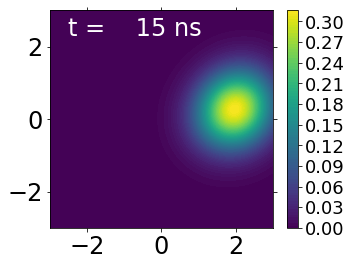

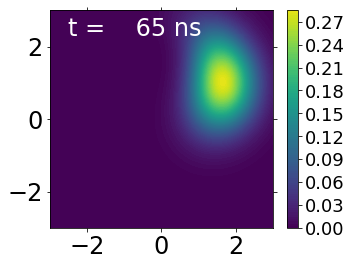

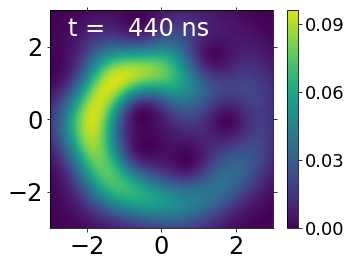

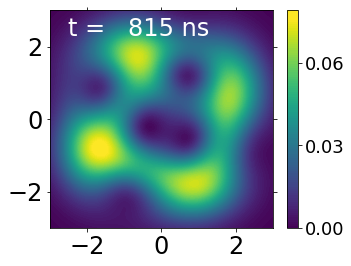

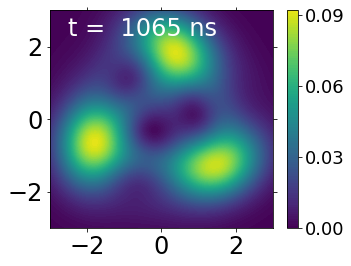

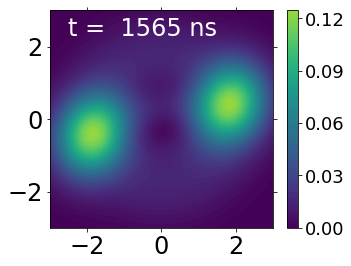

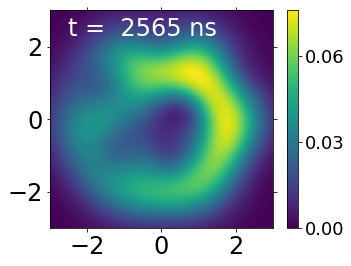

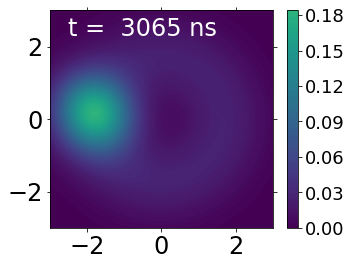

In [106]:
time_point_list = [15, 65, 440, 815, 1065, 1565, 2565, 3065]    # ns, time points in the paper
# list for the scaling parameter for each time point following the values in the paper
color_range_list = 1/np.pi * np.array([1, 0.93, 0.32, 0.24, 0.30, 0.46, 0.24, 0.89])    
for i in range(len(time_point_list)):    
    time_point = time_point_list[i]
    
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))  
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_1.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    
    # set colorbar and ticks
    cbar = plt.colorbar(ticks=np.linspace(0, 0.3, 11))
    cbar.ax.tick_params(labelsize=18)
    
    # set color range
    clim = color_range_list[i]
    plt.clim(0, clim)    # fix color range for all plots
    
    # set plot tick fontsizes and positions
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/Q_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')

### Plot Wigner function of the state. 

Following the style in the paper, the range of the color map is **fixed** at each time point.

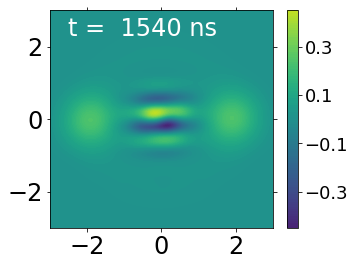

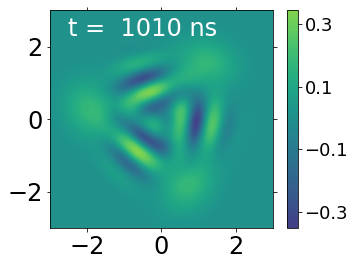

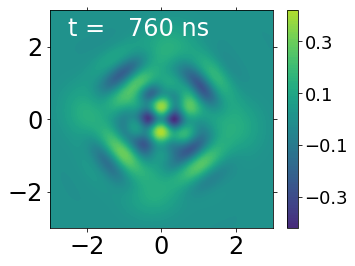

In [60]:
for time_point in [1540, 1010, 760]:    # ns
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_1.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    
    # set colorbar and ticks
    cbar = plt.colorbar(ticks=[-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
    cbar.ax.tick_params(labelsize=18)
    
    # set color range
    plt.clim(-0.55,0.55)    # fix color range for all plots
    
    # set plot tick fontsizes and positions
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)
    
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/W_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')


## $\kappa_2$, no decay

The code is basically the same except for the input data and ouput file names. 

### Plot Q function of the state. 

Following the style in the paper, the range of the color map is **adjusted** at each time point.

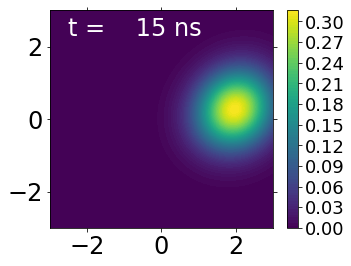

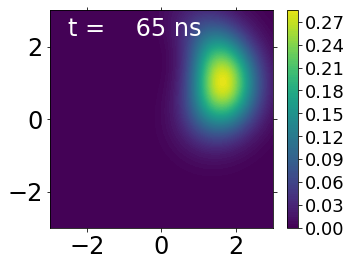

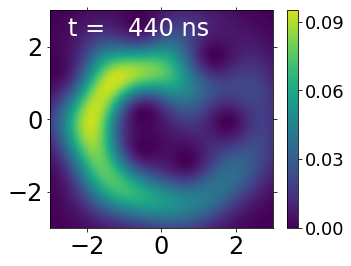

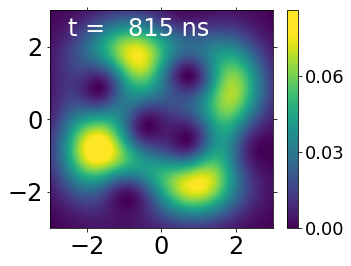

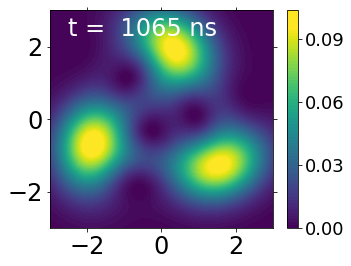

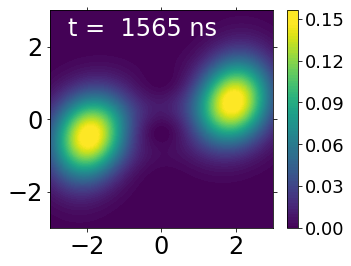

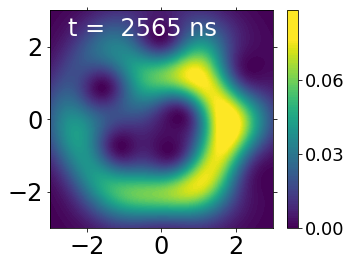

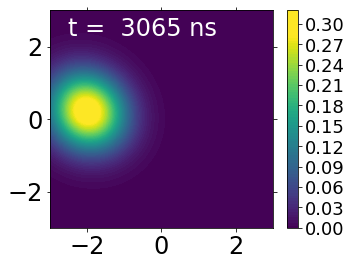

In [107]:
time_point_list = [15, 65, 440, 815, 1065, 1565, 2565, 3065]    # ns, time points in the paper
# list for the scaling parameter for each time point following the values in the paper
color_range_list = 1/np.pi * np.array([1, 0.93, 0.32, 0.24, 0.30, 0.46, 0.24, 0.89])    
for i in range(len(time_point_list)):    
    time_point = time_point_list[i]    
    
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_2.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    
    # set colorbar and ticks
    cbar = plt.colorbar(ticks=np.linspace(0, 0.3, 11))
    cbar.ax.tick_params(labelsize=18)
    
    # set color range
    clim = color_range_list[i]
    plt.clim(0, clim)    # fix color range for all plots
    
    # set plot tick fontsizes and positions    
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/Q_nodecay_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')


### Plot Wigner function of the state. 

Following the style in the paper, the range of the color map is **fixed** at each time point.

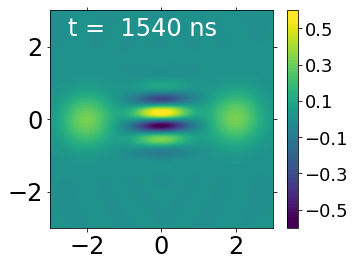

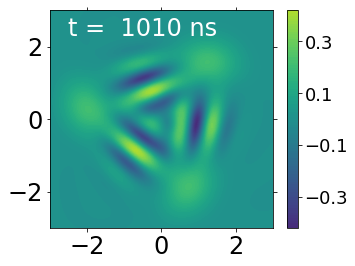

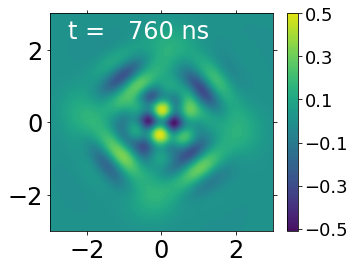

In [55]:
for time_point in [1540, 1010, 760]:    # ns
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_2.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    
    # set colorbar and ticks
    cbar = plt.colorbar(ticks=[-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
    cbar.ax.tick_params(labelsize=18)

    # set color range
    plt.clim(-0.55,0.55)    # fix color range for all plots
    
    # set plot tick fontsizes and positions
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)
    
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/W_nodecay_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')


## $\kappa_3$, stronger decay

### Plot Q function of the state. 

Following the style in the paper, the range of the color map is **adjusted** at each time point.

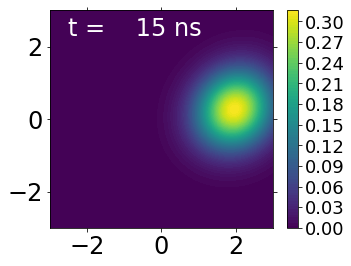

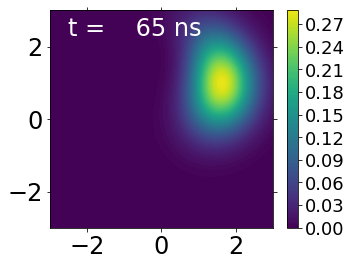

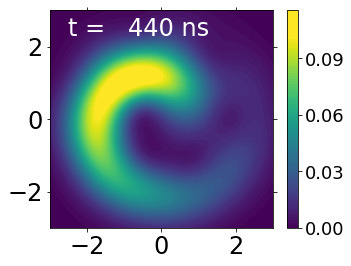

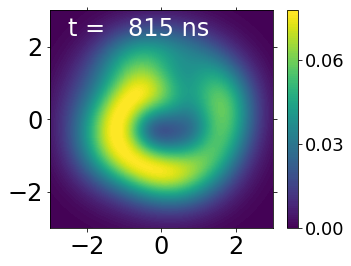

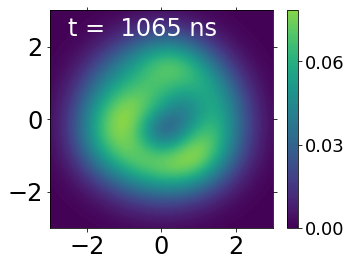

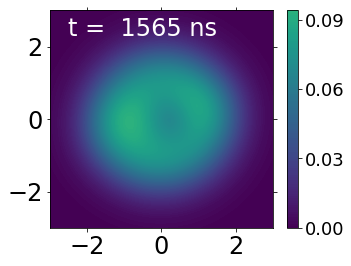

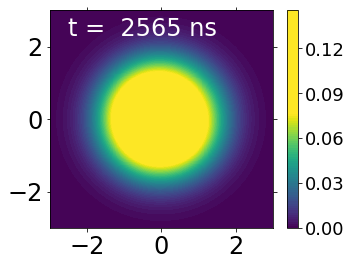

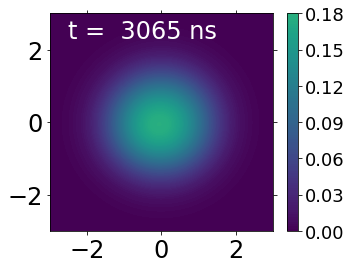

In [108]:
time_point_list = [15, 65, 440, 815, 1065, 1565, 2565, 3065]    # ns, time points in the paper
# list for the scaling parameter for each time point following the values in the paper
color_range_list = 1/np.pi * np.array([1, 0.93, 0.32, 0.24, 0.30, 0.46, 0.24, 0.89])    
for i in range(len(time_point_list)):    
    time_point = time_point_list[i]
    
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Q function
    Q_coherent = qfunc(output_3.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Q_coherent, 100)
    
    # set colorbar and ticks
    cbar = plt.colorbar(ticks=np.linspace(0, 0.3, 11))
    cbar.ax.tick_params(labelsize=18)
    
    # set color range
    clim = color_range_list[i]
    plt.clim(0, clim)    # fix color range for all plots
    
    # set plot tick fontsizes and positions    
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)

    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/Q_stronger_decay_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')


### Plot Wigner function of the state. 

Following the style in the paper, the range of the color map is **fixed** at each time point.

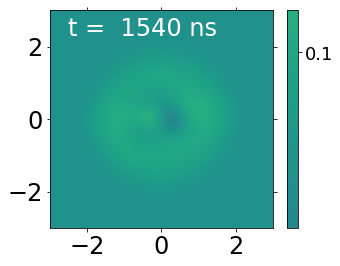

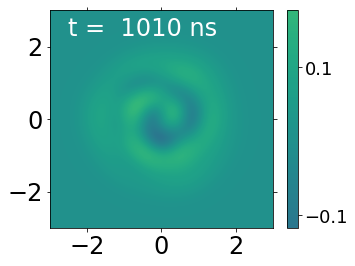

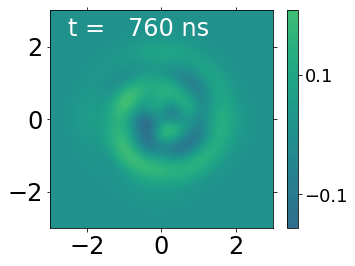

In [100]:
for time_point in [1540, 1010, 760]:    # ns
    # calculate index from the time point
    index_output_data = int(total_steps*time_point/(total_evolution_time*1e3))
    
    xvec = np.linspace(-3, 3, 500)    # range for Wigner function
    Wigner_coherent = wigner(output_3.states[index_output_data], xvec, xvec, g = 2)
    
    fig = plt.figure(figsize=(5, 4))
    plt.contourf(xvec, xvec, Wigner_coherent, 100)
    
    # set colorbar and ticks
    cbar = plt.colorbar(ticks=[-0.5, -0.3, -0.1, 0.1, 0.3, 0.5])
    cbar.ax.tick_params(labelsize=18)

    # set color range
    plt.clim(-0.55,0.55)    # fix color range for all plots
    
    # set plot tick fontsizes and positions
    ax = plt.gca()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.xticks([-2,0,2], fontsize= 24)
    plt.yticks([-2,0,2], fontsize= 24)
    
    plt.text(-2.5, 2.5, 't = %5d ns'% time_point, horizontalalignment='left',verticalalignment='center',\
         fontsize=24, color='white')
    plt.savefig('./paper_fig/W_stronger_decay_%04d.pdf'%time_point, transparent=True, bbox_inches='tight')
